# ECS7024P Coursework 3 - Kasey Purvor 200851709

## Flat Price Data Analysis

* Part 0 | Introduction
* Part 1 | Data Preprocessing and Initial Analysis
    * Part 1.1 | Data Preprocessing 
    * Part 1.2 | Price of flats in each area between July 2017 and July 2018.
    *  Part 1.3 | Visualising the price changes in each region 
    *  Part 1.4 | Comments on the data
* Part 2 | Statistical Analysis
    * Part 2.1 | Creating COntingency Table
    * Part 2.2 | Test the Independance of Region and Price Change
        * Part 2.2.1 | Chi-Squared Test
        * Part 2.2.2 | Permutation Test
    
* Part 3 | Discussion 
    
## Part 0 | Introduction 
This task examines the changes in flat prices across different regions of the UK between July 2017 and July 2018. Using both visualisations and statistical testing, this analysis aims to determine if the region of a property has a statistically significant association with the direction of its price change.

## Part 1 | Data Preprocessing and Initial Analysis

### Part 1.1 | Data Preprocessing
The flat price data has the following variables:
| Name       | Description                                                                                  |
|------------|----------------------------------------------------------------------------------------------|
| Date       | A date, which is the first of the month, between September 1st 2016 and August 1st 2019. 36 months in total. |
| Area       | The name of a local government area                                                          |
| Code       | The code of the area                                                                         |
| RegionName | The name of the region of which this area is part                                            |
| RegionCode | The code of the region                                                                       |
| Price      | Average sale price of a flat (an apartment) property in this area in the month               |

### Part 1.2 | Price of flats in each area between July 2017 and July 2018.

* The data for July 2017 and July 2018 is extracted and the rest discarded
* The price at both dates are stored in a new column each (Old_price & New_price), Redundant duplicate rows are discarded


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.gridspec as gridspec
import sklearn as sk

df_flats = pd.read_csv('average_flat_prices.csv')

# create a new column with just the 'code' prefix 3 characters
df_flats['AreaCode'] = df_flats['Code'].str[:3]

# extrat only the rows with a month column that corresponds to either july 2017 or jul 2018 
df_flats = df_flats.loc[(df_flats['Month'] == '2017-07-01') | (df_flats['Month'] == '2018-07-01')]

# Pivot the DataFrame
df_pivot = df_flats.pivot_table(index=['Area', 'Code', 'RegionName', 'RegionCode', 'AreaCode'], columns='Month', values='Price').reset_index()

# Rename the columns for clarity
df_pivot.columns.name = None
df_pivot = df_pivot.rename(columns={df_pivot.columns[5]: 'Old_Price', df_pivot.columns[6]: 'New_Price'})

df_pivot

,Area,Code,RegionName,RegionCode,AreaCode,Old_Price,New_Price
0,Barking and Dagenham,E09000002,London,E12000007,E09,233026.92790,230318.11740
1,Barnet,E09000003,London,E12000007,E09,403492.77130,393139.28910
2,Barnsley,E08000016,Yorkshire and The Humber,E12000003,E08,73054.06885,75808.74698
3,Bath and North East Somerset,E06000022,South West,E12000009,E06,242441.16080,247866.66800
4,Bedford,E06000055,East of England,E12000006,E06,167562.35620,169497.10010
...,...,...,...,...,...,...,...
146,Wirral,E08000015,North West,E12000002,E08,102486.68380,103254.08380
147,Wokingham,E06000041,South East,E12000008,E06,233806.26640,228119.70330
148,Wolverhampton,E08000031,West Midlands,E12000005,E08,81530.88640,84689.21896
149,Worcestershire,E10000034,West Midlands,E12000005,E10,127758.55150,127751.56660


### Part 1.3 | Visualise the change in area prices in each region.

* A plot is made for each region shown below. Within each plot there is a bar for every area, showing the change in price between the two dates. 
* Red bars indicate a decrease in price, blue bars indicate no change, and green bars indicate an increase in price.

| Region Code | Region Name              |
|-------------|--------------------------|
| E12000001   | North East               |
| E12000002   | North West               |
| E12000003   | Yorkshire and The Humber |
| E12000004   | East Midlands            |
| E12000005   | West Midlands            |
| E12000006   | East of England          |
| E12000007   | London                   |
| E12000008   | South East               |
| E12000009   | South West               |



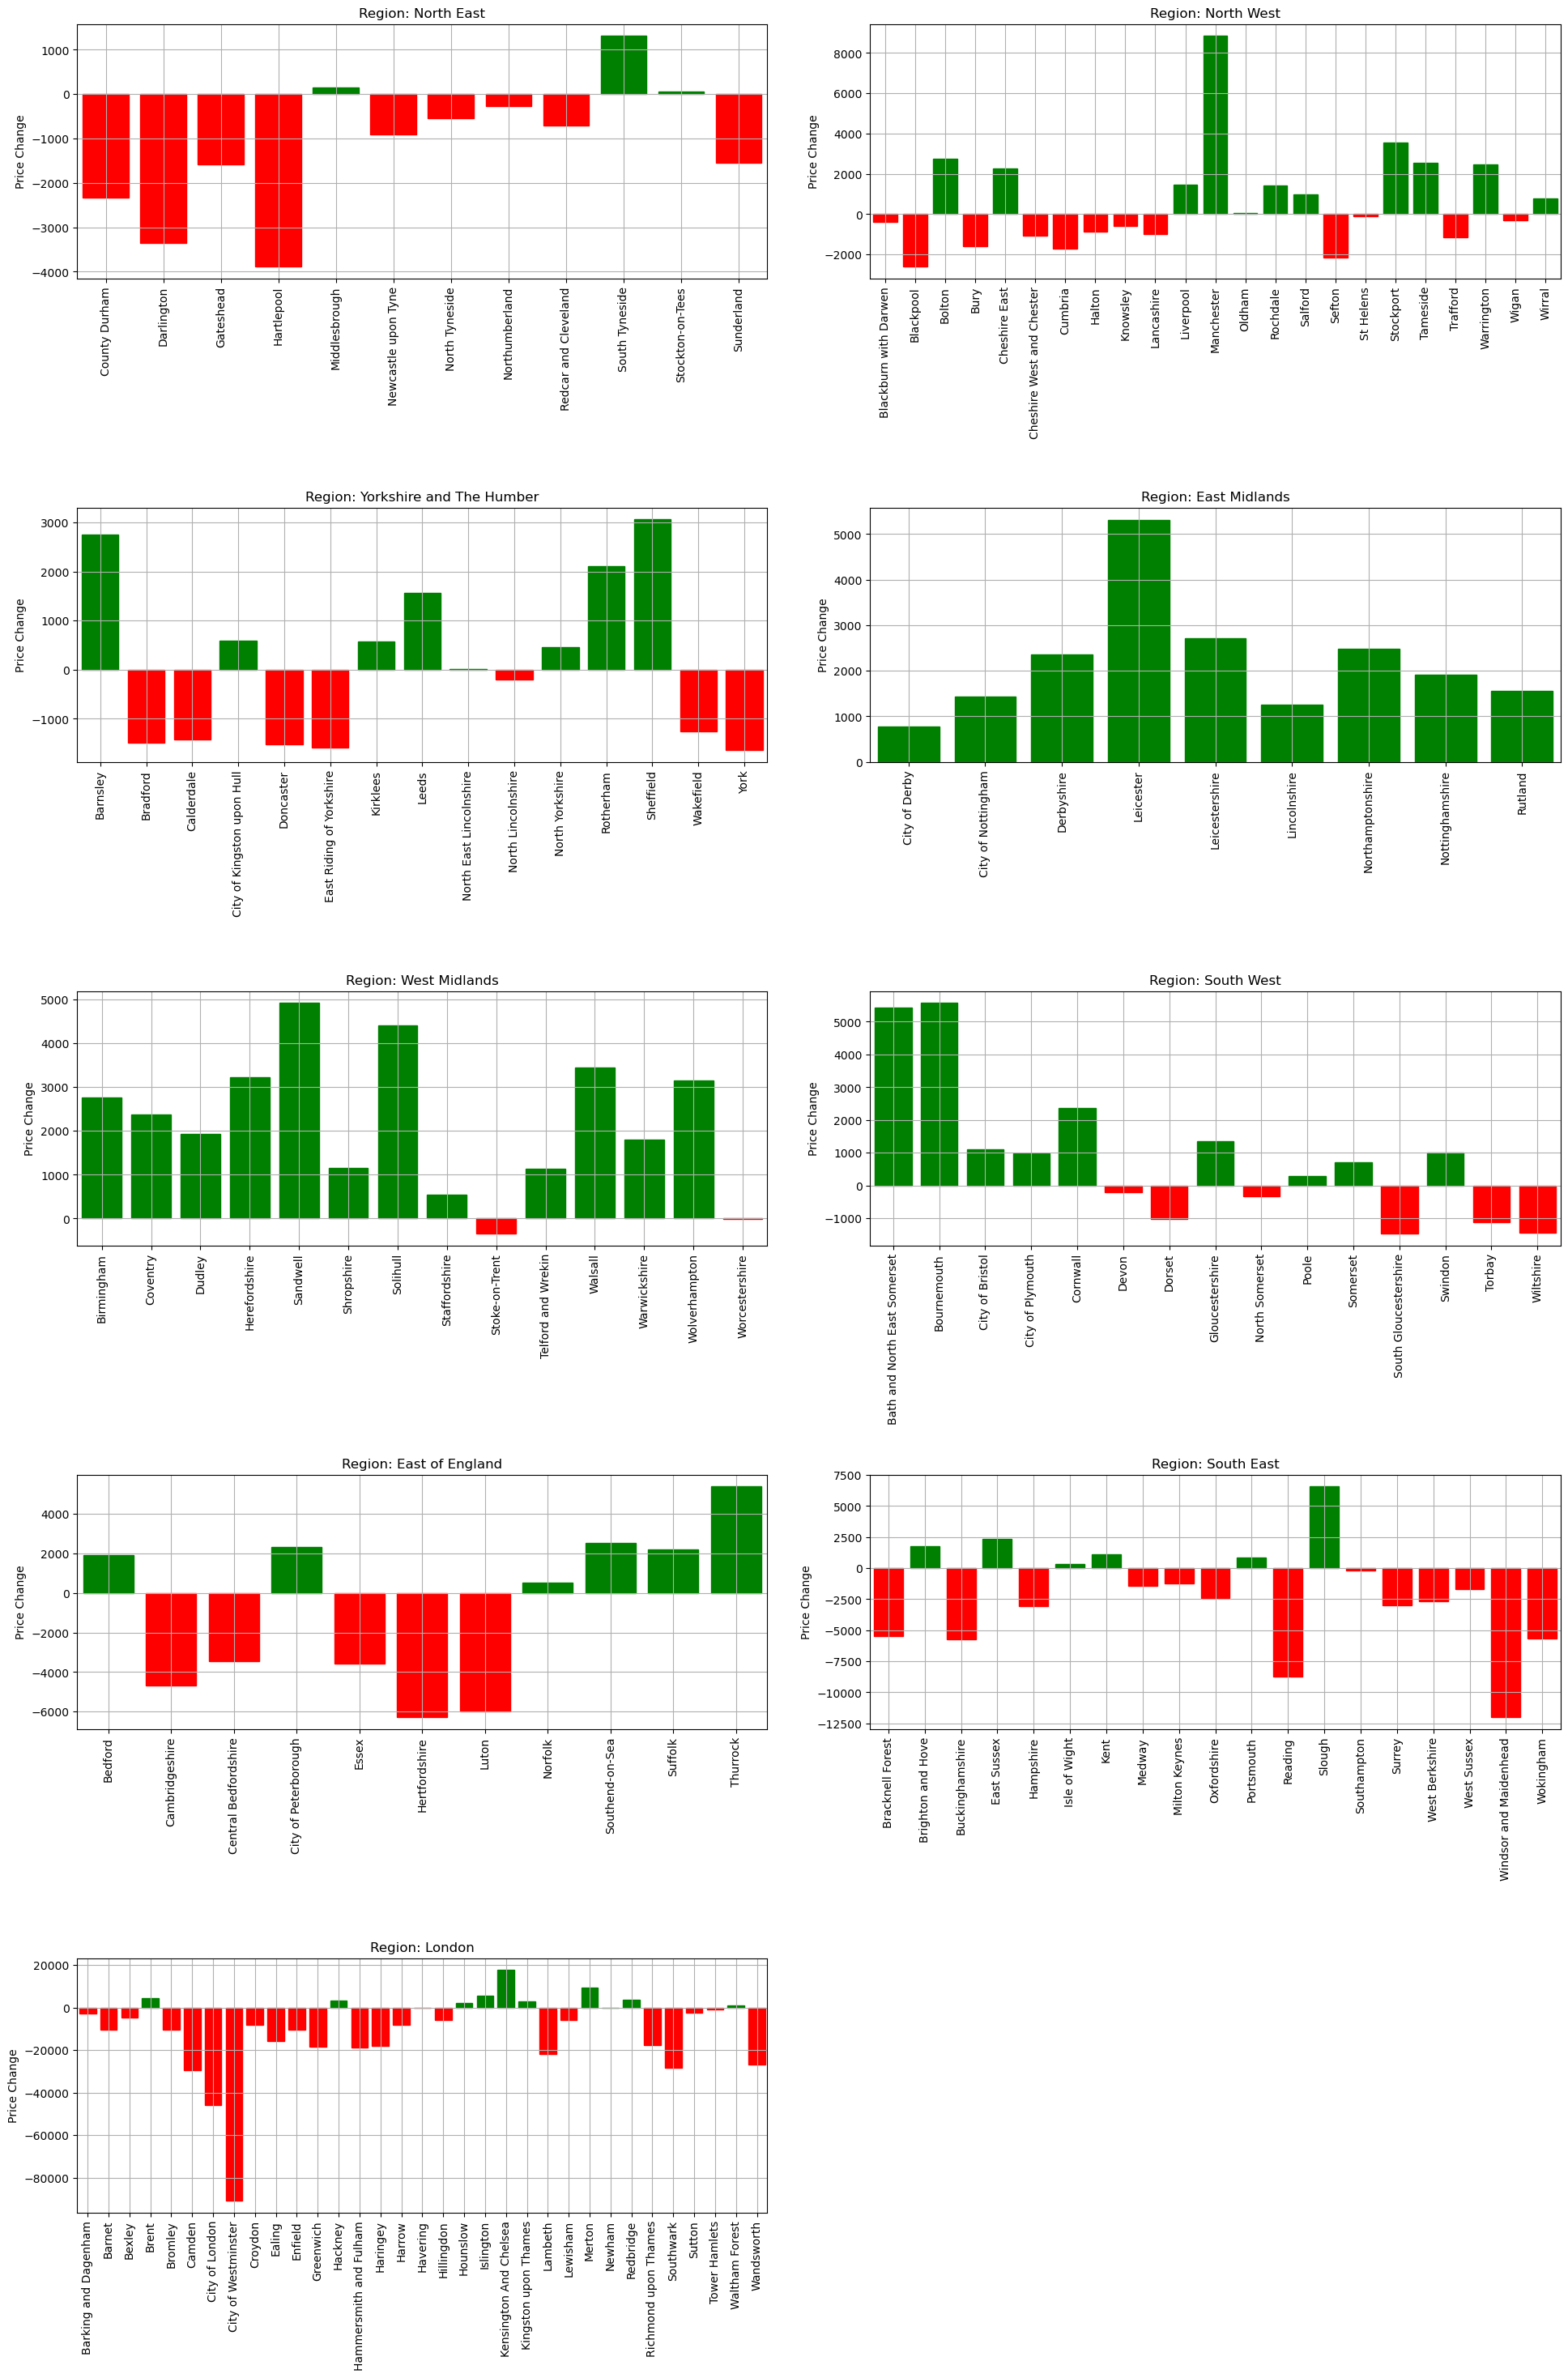

In [7]:
# get the region codes 
region_names = df_flats.loc[:, 'RegionName'].unique()
region_names

# create the subplot objects 
num_cols = 2
num_rows = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
axes = axes.flatten()

# find the min and max prices for all the data to set the axes limits 
min_price = df_flats['Price'].min()
max_price = df_flats['Price'].max()

# function for getting the price change as up or down. Assigns colours 
def get_bar_colour(values):
    new_price, old_price = values
    value = new_price - old_price
    if value > 0:
        return 'green'
    elif value == 0:
        return 'blue'
    else:
        return 'red'
    
# iterate over the region codes and plot the data
for i, region_name in enumerate(region_names):
    # get the data for the region
    region_df = df_pivot[df_pivot['RegionName'] == region_name]
    
    #get the prioce change diretion colours
    colours = list(region_df.loc[:, ['New_Price', 'Old_Price']].apply(get_bar_colour, axis=1))

    bar_plot = sns.barplot(data=region_df, y=region_df['New_Price'] - region_df['Old_Price'], x='Area', ax=axes[i])
    axes[i].set_xticks(np.arange(len(region_df['Area'])))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(f"Region: {region_name}")
    # remove the x axis title
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Price Change')
    # place a grid over each fo the bars to make them easier to see
    bar_plot.grid(True)
    
    # make the bars red or green depending on whether the price went up or down
    for i, bar in enumerate(bar_plot.patches):
        bar.set_color(colours[i])

# tidy the figure and subplots
axes[-1].remove()
fig.tight_layout(pad=3.0)

### Part 1.4 | Comment on the Data
* North West: The North West exhibits a relatively even distribution of price increases and decreases. Several bars are clustered around zero, suggesting a relatively stable market in this region. With the acception of Manchester with very large increases. 

* Yorkshire and The Humber: This region shows a slight tendency towards price increases. While the number of red and green bars is similar. The magnitude of the green bars are larger.  

* East Midlands: The East Midlands region seems to have experienced only price increase, evident from green bars

* West Midlands: The West Midlands plot reveals another significant trend toward price increases. All bars bar one are green. 

* East of England: This region shows no clear visible trend.

* South East, London & North East: All three regions have a strong tendancy for price decreases - with almost all areas within these regions showing red. 

* South West: The South West shows a mixed pattern, with both increases and decreases in prices.However there are more areas with increases and their magnitude is larger on average. 

> Based on a visual assessment of these plots, it seems unlikely that region and house price change are independent. There are apparent regional variations in the distribution and magnitude of price changes. Certain regions, like London and the South East, lean towards price decreases, while others, like the West Midlands, show a stronger tendency towards price increases. This visual observation suggests a potential association between the region and the direction of price change. However, it is important to emphasize that visual observations alone cannot definitively establish the independence or dependence of variables.

## Part 2 | Statistical Analysis

### Part 2.1 | Create a contingency table
* A new catergorical variable is created showing whether the price change was **'Up'** or **'Down'**
* The '**Region**' and '**Change_direction**' are used to create a contingency table

| Region Name              | Down | Up |
|--------------------------|------|----|
| East Midlands            | 0    | 9  |
| East of England          | 5    | 6  |
| London                   | 23   | 10 |
| North East               | 9    | 3  |
| North West               | 12   | 11 |
| South East               | 13   | 6  |
| South West               | 6    | 9  |
| West Midlands            | 2    | 12 |
| Yorkshire and The Humber | 7    | 8  |


In [8]:
# create a new column to signal an areas price change direction
df_pivot['Price_change'] = df_pivot['New_Price'] - df_pivot['Old_Price']
df_pivot['Change_direction'] = np.where(df_pivot['Price_change'] > 0, 'Up', 'Down')

# contingency table
cross_tab = pd.crosstab(df_pivot['RegionName'], df_pivot['Change_direction'])
cross_tab

Change_direction,Down,Up
RegionName,,
East Midlands,0,9
East of England,5,6
London,23,10
North East,9,3
North West,12,11
South East,13,6
South West,6,9
West Midlands,2,12
Yorkshire and The Humber,7,8


### Part 2.2 |  Test the independence of region and the prices changes
Use two methods to test the independence of region and the prices changes: 

1. A chi-square test, using the G-test statistic.
2. A permutation test.


#### Part 2.2.1 | ***Chi Squared***

* The G test statistic and p-value are calculated.
* The DOF is 8
* The observed **G test statistic is 32.19**
* The **p-value is 0.000086**

In [9]:
#perform the chi square test
g_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab, lambda_="log-likelihood")
print('The G test statistic is %4.2f' % g_stat)
print('The p-value is %f' % p_value)
print('The degrees of freedom is %4.2f' % dof)

The G test statistic is 32.19
The p-value is 0.000086
The degrees of freedom is 8.00


#### Part 2.2.2 | ***Permutation Test***

* 10000 Permutations are created
* The g test statistic is calculated for each permutation and plotted as a histogram
* The p-value is calculated as the proportion of the permuted g values that are greater than the observed g value
    * **This is 0.0002** 

The observed G test statistic is 32.19
The p-value is 0.000400


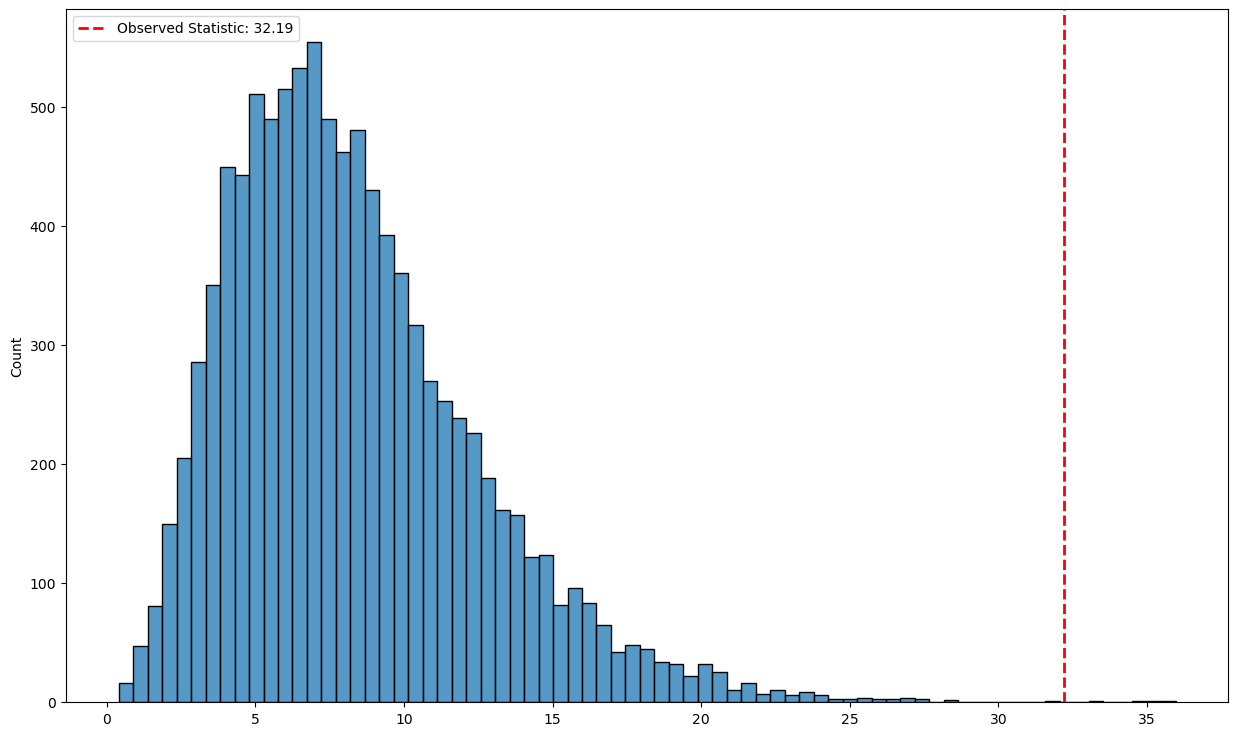

In [ ]:
# create the 2 samples (variables) that will be permuted
regions_data = (df_pivot.loc[:, 'RegionName'].values).copy()
price_change_data = (df_pivot.loc[:, 'Change_direction'].values).copy()

# create the function that will permutate the dataframe
def permute_df(predictor, target):
    
    # randomly shuffle the target data
    np.random.shuffle(target)

    # create a new dataframe with the predictor and target data
    permuted_df = pd.DataFrame({'RegionName': predictor, 'Change_direction': target})
    
    # create a contingency table
    contingency_table = pd.crosstab(    ['RegionName'], permuted_df['Change_direction'])
    
    # calculate the g test statistic
    g_stat, _, _, _ = stats.chi2_contingency(contingency_table, lambda_="log-likelihood")
    return g_stat

# create the loop for N Permutations. store the g statistic in a list
N_loops = 10000
g_stats = []
for i in range(N_loops):
    g_stat = permute_df(regions_data, price_change_data.copy())
    g_stats.append(g_stat)

# calculate the g-value of the observed data
g_stat_observed, _, _, _ = stats.chi2_contingency(cross_tab, lambda_="log-likelihood")
print('The observed G test statistic is %4.2f' % g_stat_observed)

# plot the histogram of the g statistics
plt.figure(figsize=(15, 9))
sns.histplot(g_stats)

plt.axvline(g_stat_observed, color='red', linestyle='dashed', linewidth=2, label=f'Observed Statistic: {g_stat_observed:.2f}')
plt.legend()

# calculate the p-value of the observed data by comparing to the permuted g values
p_stat = np.mean(g_stats >= g_stat_observed)
print('The p-value is %4.6f' % p_stat)

### Part 1.3 | Discussion

Both the chi-squared test and the permutation test aim to determine whether there is a statistically significant association between the region of a property and the direction of its price change (increase or decrease) between July 2017 and July 2018. The null hypothesis for both tests is that the region and the price change are independent, meaning there is no relationship between them. The alternative hypothesis is that they are not independent, implying a potential association between the region and the direction of price change. Both tests ultimately rely on comparing observed data to a distribution of expected values under the null hypothesis to determine significance.

The Chi-Squared Test relies on the theoretical distribution of the chi-squared statistic under the assumption of independence. It calculates the expected frequencies for each combination of region and price change based on the marginal totals. The difference between the observed and expected frequencies is used to compute the G test statistic, which measures the discrepancy from independence. The p-value is then calculated as the probability of observing a G test statistic at least as extreme as the observed value under the assumption of independence.

A permutation test differs in that it is non-parametric approach and does not rely on distributional assumptions. It instead simulates the data under the null hypothesis by randomly shuffling the price change labels across different regions, creating multiple permuted datasets. The G test statistic is calculated for each permutation, forming a distribution of G values under the assumption of independence. The p-value is determined by comparing the observed G value to this distribution

The p-value represents the probability of observing the obtained results (or more extreme results) if the null hypothesis of independence were true. Both the chi-squared and permutation tests yield extremely low p-values, much smaller than the conventional significance level of 0.05. 
> Based on the results of both tests, we reject the null hypothesis of independence. The low p-values provide strong evidence to suggest that the region and the direction of house price change are not independent. This aligns with the visual observations from the plots, which indicated regional variations in price change patterns.
Therefore, we can conclude that there is a statistically significant association between the region of a property and whether its price increased or decreased between July 2017 and July 2018.